# Twin SVM

**Creators:** Mahdieh Alizadeh & Mohamad AlSaeedi

**Pattern 1402 - khordad**

**Email address:** Mahdieh20201@gmail.com

![Mahdieh](../SupplementaryDocuments/EigenValueDecomposionImage/passport_photo.jpg)


## TSVM

 The Twin SVM problem can be viewed as two regression tasks: we aim to fit two regression lines to the data of both classes such that they are close to their own class data points and far from the data points of the other class. Therefore, following this approach, we first define the loss function in the square loss


$$
A = \begin{bmatrix}
X_{11} & \ldots & X_{1n} \\
\vdots & \ddots & \vdots \\
X_{m_11} & \ldots & X_{m_1n}
\end{bmatrix}
$$



where \(A\) represents the data on class \(+1\).

$$
B = \begin{bmatrix}
X_{11} & \ldots & X_{1n} \\
\vdots & \ddots & \vdots \\
X_{m_21} & \ldots & X_{m_2n}
\end{bmatrix}
$$

where \(B\) represents the data on class \(-11\).

$$A W_1 + b_1 = 0 \quad \text{and} \quad B W_2 + b_2 = 0$$



As we know, the label of data points for class one is +1, so we replace \( y = +1 \) with \( e1 \). Similarly, for the hyperplane of the second class, we have assigned \( y_2 = -1 = -e2\).

$$
e = y_1 - \hat{y},
$$

$$
l(e) = \|e\|^2, \quad \|AW_1 + e_1 b_1 - \hat{y}\|^2 = \|AW_1 + e_1 b_1 - e_1\|^2
$$

$$
e = AW_1 + e_1 (b - 1) = AW_1 + e_1 b_1
$$


$$
e = y_2 - \hat{y},
$$

$$
l(e) = \|e\|^2, \quad \|BW_2 + e_2 b_2 - \hat{y}\|^2 = \|BW_2 + e_2 b_2 + e_2\|^2
$$

$$
e = BW_2 + e_1 (b + 1) = BW_2 + e_2 b_2
$$



### Fit Module


Consider a binary classification problem where m1 is the number of data points belonging to class +1 and m2 is the number of data points belonging to class -1. Then, let matrix A represent the data points of class +1 in the space R^m_1*n, and B represent the data points of class -1 in the space R^m_2* n. Two non-parallel hyperplanes from TWSVM (Twin Support Vector Machine) can be represented as follows:

$$
x^T w_1 + b_1 = 0 \quad \text{and} \quad x^T w_2 + b_2 = 0
$$

The goal of TWSVM (Twin Support Vector Machine) is to generate two non-parallel hyperplanes in an n -dimensional space such that each hyperplane is close to one class while being sufficiently far from the data points of the other class. A new data point is then assigned to either class -1 or +1 based on its proximity to each of these two hyperplanes.

The linear classifiers are obtained by solving the following optimization problems:


### Similar to SVM

$$
\begin{aligned}
&\min_{w^{(1)}, b^{(1)}, \xi^{(2)}} \frac{1}{2} \left\| A w^{(1)} + e_1 b^{(1)} \right\|^2 + c_1 e^T_2 \xi^{(2)} \\
&\text{s.t.} \quad -\left( B w^{(1)} + e_2 b^{(1)} \right) \geq e_2 - \xi^{(2)}, \\
&\xi^{(2)} \geq 0.
\end{aligned}
$$

$$
\begin{aligned}
&\min_{w^{(2)}, b^{(2)}, \xi^{(1)}} \frac{1}{2} \left\| B w^{(2)} + e_2 b^{(2)} \right\|^2 + c_2 e^T_1 \xi^{(1)} \\
&\text{s.t.} \quad -\left( A w^{(2)} + e_1 b^{(2)} \right) \geq e_1 - \xi^{(1)}, \\
&\xi^{(1)} \geq 0.
\end{aligned}
$$


### Solution


C1 and C2 are our penalty parameters, and 𝝃1 and 𝝃2 are our slack vectors. e1 and e_2 are vectors of all ones with appropriate dimensions for ease of operation. To solve the two minimization problems above, we need to use the Lagrangian dual problem:


We introduce the Lagrange multipliers 𝜶 and 𝜷:


$$
\begin{aligned}
L(w^{(1)}, b^{(1)}, \xi^{(2)}, \alpha, \beta) &= \frac{1}{2} \left( A w^{(1)} + e_1 b^{(1)} \right)^T \left( A w^{(1)} + e_1 b^{(1)} \right) \\
&\quad + c_1 e_2^T \xi^{(2)} - \alpha^T \left( - \left( B w^{(1)} + e_2 b^{(1)} \right) + \xi^{(2)} - e_2 \right) - \beta^T \xi^{(2)},
\end{aligned}
$$

we know  𝜶 , 𝜷 are vectors:

$$
\alpha = (\alpha_1, \alpha_2, \ldots, \alpha_{m_2})^T \quad \text{and} \quad \beta = (\beta_1, \beta_2, \ldots, \beta_{m_2})^T
$$


### KKT conditions


We write down the KKT conditions to solve this problem:


1. Partial derivative with respect to \( w^(1) \):
$$
A^T (A w^{(1)} + e_1 b^{(1)}) + B^T \alpha = 0
$$

2. Partial derivative with respect to \( b^(1) \):
$$
e_1^T (A w^{(1)} + e_1 b^{(1)}) + e_2^T \alpha = 0
$$

3. Partial derivative with respect to \( xi^(2) \):
$$
c_1 e_2 - \alpha - \beta = 0
$$

4. Complementary slackness conditions:
$$
\alpha^T \left( - \left( B w^{(1)} + e_2 b^{(1)} \right) + \xi^{(2)} - e_2 \right) = 0
$$
$$
\beta^T \xi^{(2)} = 0
$$

Based on these relations, we can understand:


$$
\begin{cases}
c_1 e_2 - \alpha - \beta = 0 \\
\alpha \geq 0, \ \beta \geq 0 \\
\end{cases}
\quad
\left\{
\begin{aligned}
&0 \leq \alpha \leq c_1
\end{aligned}
\right.
$$

And from the combination of the two following relations, we have:

$$
A^T (A w^{(1)} + e_1 b^{(1)}) + B^T \alpha = 0
$$

$$
e_1^T (A w^{(1)} + e_1 b^{(1)}) + e_2^T \alpha = 0
$$

$$
\left[ \begin{array}{cc}
A^T & e_1^T
\end{array} \right]
\left[ \begin{array}{c}
A & e_1
\end{array} \right]
\begin{bmatrix}
w^{(1)} &
b^{(1)}
\end{bmatrix}^T
+ \left[ B^T \quad e_2^T \right] \alpha = 0
$$


### First Hyperplane


We define H , G , and  U  as follows:

$$
u = \begin{bmatrix} w^{(1)} & b^{(1)} \end{bmatrix}^T
$$

$$
H = \begin{bmatrix} A & e_1 \end{bmatrix}, \quad G = \begin{bmatrix} B & e_2 \end{bmatrix}
$$

Then the equation can be written in the following form:

$$
\left[ \begin{array}{cc}
A^T & e_1^T
\end{array} \right]
\left[ \begin{array}{c}
A & e_1
\end{array} \right]
\begin{bmatrix}
w^{(1)} &
b^{(1)}
\end{bmatrix}^T
+ \left[ B^T \quad e_2^T \right] \alpha = 0
$$

$$
H^T H u + G^T \alpha = 0
$$

$$
u = -\left(H^T H\right)^{-1} G^T \alpha
$$

Then we transform the problem into a maximization problem using the Lagrangian dual:

$$
\max_{\alpha} \quad e_2^T \alpha - \frac{1}{2} \alpha^T G (H^T H)^{-1} G^T \alpha
$$

$$
\text{s.t.} \quad 0 \leq \alpha \leq c_1
$$


### Retry second hyperplane

Similarly, we will have for the second hyperplane:

$$
\max_{\gamma} \quad e_1^T \gamma - \frac{1}{2} \gamma^T P (Q^T Q)^{-1} P^T \gamma
$$

$$
\text{s.t.} \quad 0 \leq \lambda \leq c_2
$$

$$
\text{Let } P = \begin{bmatrix} A & e_1 \end{bmatrix}, \quad Q = \begin{bmatrix} B & e_2 \end{bmatrix}, \quad v = \begin{bmatrix} w^{(2)} & b^{(2)} \end{bmatrix}^T
$$

$$
\text{we can get } v = -(Q^T Q)^{-1} P^T \gamma
$$

### Kernel 

For non-linear conditions, we will explain the kernel function and describe two hyperplanes in kernel space as follows:

$$
K(x^T, C^T) u_1 + b_1 = 0, \quad K(x^T, C^T) u_2 + b_2 = 0
$$

$$
C^T = \begin{bmatrix} A & B \end{bmatrix}^T
$$

Now, the optimization problem for non-linear TWSVM can be written as follows:

$$
\begin{aligned}
&\min_{w^{(1)}, b^{(1)}, \xi^{(2)}} \frac{1}{2} \left\| K(A, C^T) w^{(1)} + e_1 b^{(1)} \right\|^2 + c_1 e_2^T \xi^{(2)} \\
&\text{s.t.} \quad -\left( K(B, C^T) w^{(1)} + e_2 b^{(1)} \right) \geq e_2 - \xi^{(2)}, \\
&\xi^{(2)} \geq 0.
\end{aligned}
$$

$$
\begin{aligned}
&\min_{w^{(2)}, b^{(2)}, \xi^{(1)}} \frac{1}{2} \left\| K(B, C^T) w^{(2)} + e_2 b^{(2)} \right\|^2 + c_2 e_1^T \xi^{(1)} \\
&\text{s.t.} \quad \left( K(A, C^T) w^{(2)} + e_1 b^{(2)} \right) \geq e_1 - \xi^{(1)}, \\
&\xi^{(1)} \geq 0.
\end{aligned}
$$

Adding Lagrange multipliers 𝛼,𝛽:

$$
\begin{aligned}
L(w^{(1)}, b^{(1)}, \xi^{(2)}, \alpha, \beta) &= \frac{1}{2} \left( K(A^T, C^T) w^{(1)} + e_1 b^{(1)} \right)^T \left( K(A^T, C^T) w^{(1)} + e_1 b^{(1)} \right) \\
&\quad + c_1 e_2^T \xi^{(2)} - \alpha^T \left( -\left( K(B^T, C^T) w^{(1)} + e_2 b^{(1)} \right) + \xi^{(2)} - e_2 \right) \\
&\quad - \beta^T \xi^{(2)}
\end{aligned}
$$

We form the KKT conditions similar to before:

$$
K(A^T, C^T)^T \left( K(A^T, C^T) w^{(1)} + e_1 b^{(1)} \right) + K(B^T, C^T)^T \alpha = 0
$$

$$
e_1^T \left( K(A^T, C^T) w^{(1)} + e_1 b^{(1)} \right) + e_2^T \alpha = 0
$$

$$
c_1 e_2 - \alpha - \beta = 0
$$

$$
-\left( K(B^T, C^T) w^{(1)} + e_2 b^{(1)} \right) + \xi^{(2)} \geq e_2, \quad \xi^{(2)} \geq 0
$$

$$
\alpha^T \left( -\left( K(B^T, C^T) w^{(1)} + e_2 b^{(1)} \right) + \xi^{(2)} - e_2 \right) = 0, \quad \beta^T \xi^{(2)} = 0
$$

$$
\alpha \geq 0, \quad \beta \geq 0
$$

Similar to before, from conditions 1 and 2, we derive the following result:

$$
\left[ K(A, C^T)^T \quad e_1^T \right]
\begin{bmatrix}
K(A, C^T) & e_1
\end{bmatrix}
\begin{bmatrix}
w^{(1)} &
b^{(1)}
\end{bmatrix}^T
+ \left[ K(B, C^T)^T \quad e_2^T \right] \alpha = 0
$$

$$
S = \left[ K(A, C^T) \quad e_1 \right], \quad R = \left[ K(B, C^T) \quad e_2 \right], \quad z = \left[ w^{(1)} \quad b^{(1)} \right]^T
$$

$$
S^T S z + R^T \alpha = 0
$$

$$
z = -\left(S^T S\right)^{-1} R^T \alpha
$$

Then we write the dual of the original problem as follows:

$$
\max_{\alpha} \quad e_2^T \alpha - \frac{1}{2} \alpha^T R (S^T S)^{-1} R^T \alpha
$$

$$
\text{s.t.} \quad 0 \leq \alpha \leq c_1
$$

Similarly, for the second hyperplane, we will have the dual as follows:

$$
\max_{\gamma} \quad e_1^T \gamma - \frac{1}{2} \gamma^T L (N^T N)^{-1} L^T \gamma
$$

$$
\text{s.t.} \quad 0 \leq \gamma \leq c_2,
$$

$$
\text{where } L = \left[ K(A, C^T) \quad e_1 \right], \quad N = \left[ K(B, C^T) \quad e_2 \right].
$$

$$
\text{Let } z_2 = \left[ w^{(2)} \quad b^{(2)} \right]^T, \text{ we can get}
$$

$$
z_2 = \left( N^T N \right)^{-1} L^T \gamma
$$


## Example 1 - OverLap Dataset


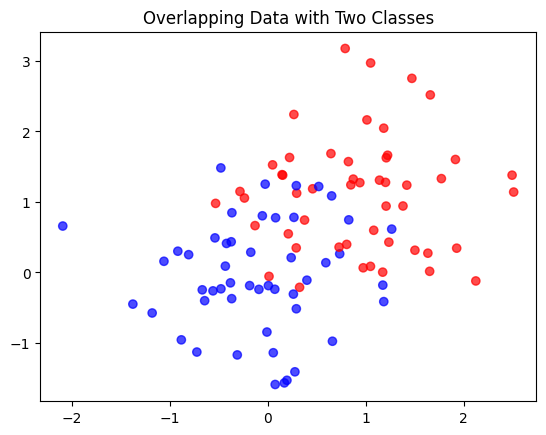

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score
# Generate overlapping data
X, y = make_blobs(n_samples=100, centers=[(0, 0), (1, 1)], cluster_std=0.8, random_state=42)


# Split data into two classes
A = X[y == 0]
B = X[y == 1]

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title('Overlapping Data with Two Classes')
plt.show()


-0.3499401516165772
-0.37170750856816415
(50, 2)


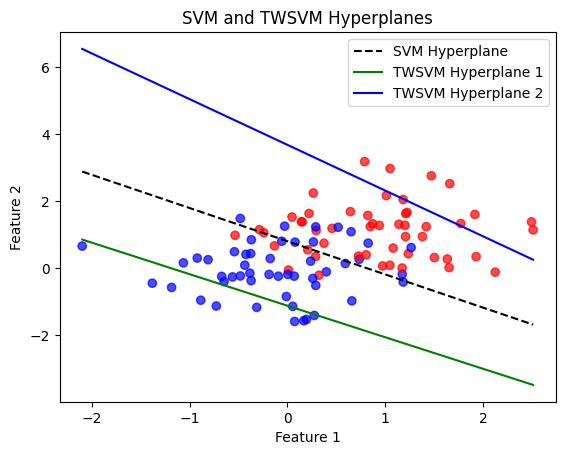

SVM Accuracy: 83.00%
TWSVM Accuracy: 82.00%


In [ ]:
# Train SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)




def compute_hyperplanes(A, B, c1, c2):

    # Number of samples in each class
    m1, n = A.shape
    m2 = B.shape[0]

    # Create the H and G matrices
    e1 = np.ones((m1, 1))
    e2 = np.ones((m2, 1))

    H = np.hstack((A, e1))
    G = np.hstack((B, e2))


    H_inv = np.linalg.inv(H.T.dot(H))
    # Objective function for the dual problem
    def dual_objective(alpha, G, H_inv):
        return - (np.dot(e2.T, alpha) - 0.5 * np.dot(alpha.T, np.dot(G, np.dot(H_inv, G.T.dot(alpha)))))

    # Constraints for the dual problem
    bounds = [(0, c1) for _ in range(m2)]

    # Solve the dual problem to find alpha

    result = minimize(dual_objective, np.zeros(m2), args=(G, H_inv), bounds=bounds)

    alpha = result.x

    # Compute u from alpha
    u = -np.dot(np.dot(H_inv, G.T), alpha)

    # Extract w^(1) and b^(1) from u
    w1 = u[:-1]
    b1 = u[-1]


    Q = np.hstack((B, e2))
    P = np.hstack((A, e1))
    Q_inv = np.linalg.inv(Q.T.dot(Q))

    # Objective function for the second dual problem
    def dual_objective_gamma(gamma, P, Q_inv):
        return - (np.dot(e1.T, gamma) - 0.5 * np.dot(gamma.T, np.dot(P, np.dot(Q_inv, P.T.dot(gamma)))))

    # Constraints for the dual problem
    bounds_gamma = [(0, c2) for _ in range(m1)]

    # Solve the dual problem to find gamma

    result_gamma = minimize(dual_objective_gamma, np.zeros(m1), args=(P, Q_inv), bounds=bounds_gamma)

    gamma = result_gamma.x

    # Compute v from gamma
    v = -np.dot(np.dot(Q_inv, P.T), gamma)

    # Extract w^(2) and b^(2) from v
    w2 = v[:-1]
    b2 = v[-1]
    print(w1[0])
    print(w1[1])
    print(A.shape)
    return (w1, b1), (w2, b2)

# Compute TWSVM hyperplanes
c1 = 1.0
c2 = 1.0
hyperplane1, hyperplane2 = compute_hyperplanes(A, B, c1, c2)
# Plot data and hyperplanes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

# Plot SVM hyperplane
w_svm = svm.coef_[0]
b_svm = svm.intercept_[0]
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals_svm = -(w_svm[0] * x_vals + b_svm) / w_svm[1]
plt.plot(x_vals, y_vals_svm, 'k--', label='SVM Hyperplane')

# Plot TWSVM hyperplanes
w1, b1 = hyperplane1
w2, b2 = hyperplane2
y_vals_twsvm1 = -(w1[0] * x_vals + b1) / w1[1]
y_vals_twsvm2 = -(w2[0] * x_vals + b2) / w2[1]
plt.plot(x_vals, y_vals_twsvm1, 'g-', label='TWSVM Hyperplane 1')
plt.plot(x_vals, y_vals_twsvm2, 'b-', label='TWSVM Hyperplane 2')

plt.legend()
plt.title('SVM and TWSVM Hyperplanes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

class TWSVMClassifier:
    def __init__(self, w1, b1, w2, b2):
        self.w1 = w1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2

    def predict(self, X):
        dist1 = np.abs(np.dot(X, self.w1) + self.b1)
        dist2 = np.abs(np.dot(X, self.w2) + self.b2)
        return np.where(dist1 < dist2, 0, 1)

# train the models
svm_predictions = svm.predict(X)
twsvm_clf = TWSVMClassifier(hyperplane1[0], hyperplane1[1], hyperplane2[0], hyperplane2[1])
twsvm_predictions = twsvm_clf.predict(X)


# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y, svm_predictions)

# Calculate accuracy for TWSVM
twsvm_accuracy = accuracy_score(y, twsvm_predictions)

# Print the results
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"TWSVM Accuracy: {twsvm_accuracy * 100:.2f}%")

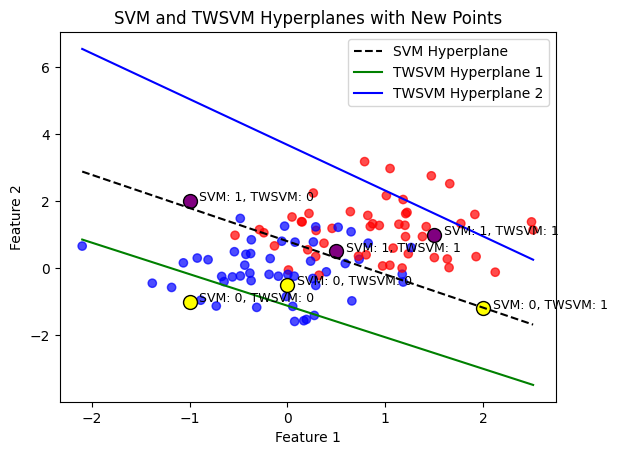

In [ ]:
# New data points to classify
new_points = np.array([[0.5, 0.5], [-1, -1], [1.5, 1], [0, -0.5], [2, -1.2],[-1, 2]])

# Predict using SVM
svm_predictions = svm.predict(new_points)

# train the model
twsvm_clf = TWSVMClassifier(hyperplane1[0], hyperplane1[1], hyperplane2[0], hyperplane2[1])
twsvm_predictions = twsvm_clf.predict(new_points)

# Plot data and hyperplanes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

# Plot SVM hyperplane
w_svm = svm.coef_[0]
b_svm = svm.intercept_[0]
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals_svm = -(w_svm[0] * x_vals + b_svm) / w_svm[1]
plt.plot(x_vals, y_vals_svm, 'k--', label='SVM Hyperplane')

# Plot TWSVM hyperplanes
w1, b1 = hyperplane1
w2, b2 = hyperplane2
y_vals_twsvm1 = -(w1[0] * x_vals + b1) / w1[1]
y_vals_twsvm2 = -(w2[0] * x_vals + b2) / w2[1]
plt.plot(x_vals, y_vals_twsvm1, 'g-', label='TWSVM Hyperplane 1')
plt.plot(x_vals, y_vals_twsvm2, 'b-', label='TWSVM Hyperplane 2')

# Plot new points with their classifications
for i, point in enumerate(new_points):
    plt.scatter(point[0], point[1], c='yellow' if svm_predictions[i] == 0 else 'purple', edgecolors='k', marker='o', s=100)
    plt.text(point[0] + 0.1, point[1], f'SVM: {svm_predictions[i]}, TWSVM: {twsvm_predictions[i]}', fontsize=9)

plt.legend()
plt.title('SVM and TWSVM Hyperplanes with New Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Example 2 - Complex Dataset

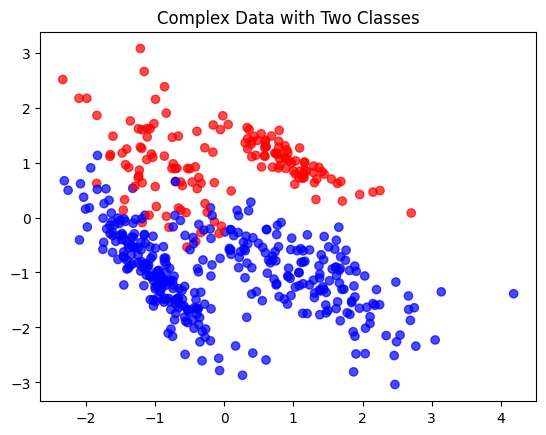

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn import datasets


# Create a synthetic imbalanced dataset
X, y = datasets.make_classification(n_samples=500, n_features=2,
                                    n_informative=2, n_redundant=0,
                                    n_clusters_per_class=2,
                                    weights=[0.7, 0.3], flip_y=0,
                                    random_state=1)





# Split data into two classes
A = X[y == 0]
B = X[y == 1]

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title('Complex Data with Two Classes')
plt.show()


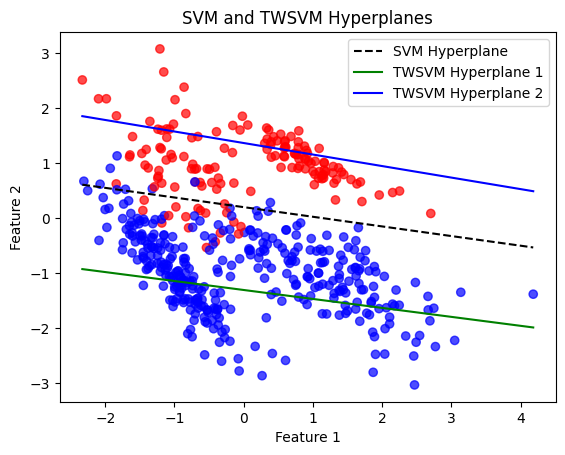

SVM Accuracy: 95.00%
TWSVM Accuracy: 95.40%


In [ ]:
# Train SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)




def compute_hyperplanes(A, B, c1, c2):

    # Number of samples in each class
    m1, n = A.shape
    m2 = B.shape[0]

    # Create the H and G matrices
    e1 = np.ones((m1, 1))
    e2 = np.ones((m2, 1))

    H = np.hstack((A, e1))
    G = np.hstack((B, e2))


    H_inv = np.linalg.inv(H.T.dot(H))
    # Objective function for the dual problem
    def dual_objective(alpha, G, H_inv):
        return - (np.dot(e2.T, alpha) - 0.5 * np.dot(alpha.T, np.dot(G, np.dot(H_inv, G.T.dot(alpha)))))

    # Constraints for the dual problem
    bounds = [(0, c1) for _ in range(m2)]

    # Solve the dual problem to find alpha

    result = minimize(dual_objective, np.zeros(m2), args=(G, H_inv), bounds=bounds)

    alpha = result.x

    # Compute u from alpha
    u = -np.dot(np.dot(H_inv, G.T), alpha)

    # Extract w^(1) and b^(1) from u
    w1 = u[:-1]
    b1 = u[-1]


    Q = np.hstack((B, e2))
    P = np.hstack((A, e1))
    Q_inv = np.linalg.inv(Q.T.dot(Q))

    # Objective function for the second dual problem
    def dual_objective_gamma(gamma, P, Q_inv):
        return - (np.dot(e1.T, gamma) - 0.5 * np.dot(gamma.T, np.dot(P, np.dot(Q_inv, P.T.dot(gamma)))))

    # Constraints for the dual problem
    bounds_gamma = [(0, c2) for _ in range(m1)]

    # Solve the dual problem to find gamma

    result_gamma = minimize(dual_objective_gamma, np.zeros(m1), args=(P, Q_inv), bounds=bounds_gamma)

    gamma = result_gamma.x

    # Compute v from gamma
    v = -np.dot(np.dot(Q_inv, P.T), gamma)

    # Extract w^(2) and b^(2) from v
    w2 = v[:-1]
    b2 = v[-1]

    return (w1, b1), (w2, b2)

# Compute TWSVM hyperplanes
c1 = 1.0
c2 = 1.0
hyperplane1, hyperplane2 = compute_hyperplanes(A, B, c1, c2)
# Plot data and hyperplanes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

# Plot SVM hyperplane
w_svm = svm.coef_[0]
b_svm = svm.intercept_[0]
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals_svm = -(w_svm[0] * x_vals + b_svm) / w_svm[1]
plt.plot(x_vals, y_vals_svm, 'k--', label='SVM Hyperplane')

# Plot TWSVM hyperplanes
w1, b1 = hyperplane1
w2, b2 = hyperplane2
y_vals_twsvm1 = -(w1[0] * x_vals + b1) / w1[1]
y_vals_twsvm2 = -(w2[0] * x_vals + b2) / w2[1]
plt.plot(x_vals, y_vals_twsvm1, 'g-', label='TWSVM Hyperplane 1')
plt.plot(x_vals, y_vals_twsvm2, 'b-', label='TWSVM Hyperplane 2')

plt.legend()
plt.title('SVM and TWSVM Hyperplanes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

class TWSVMClassifier:
    def __init__(self, w1, b1, w2, b2):
        self.w1 = w1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2

    def predict(self, X):
        dist1 = np.abs(np.dot(X, self.w1) + self.b1)
        dist2 = np.abs(np.dot(X, self.w2) + self.b2)
        return np.where(dist1 < dist2, 0, 1)

# train the models
svm_predictions = svm.predict(X)
twsvm_clf = TWSVMClassifier(hyperplane1[0], hyperplane1[1], hyperplane2[0], hyperplane2[1])
twsvm_predictions = twsvm_clf.predict(X)


# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y, svm_predictions)

# Calculate accuracy for TWSVM
twsvm_accuracy = accuracy_score(y, twsvm_predictions)

# Print the results
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"TWSVM Accuracy: {twsvm_accuracy * 100:.2f}%")

## Example 3 - Moon Dataset

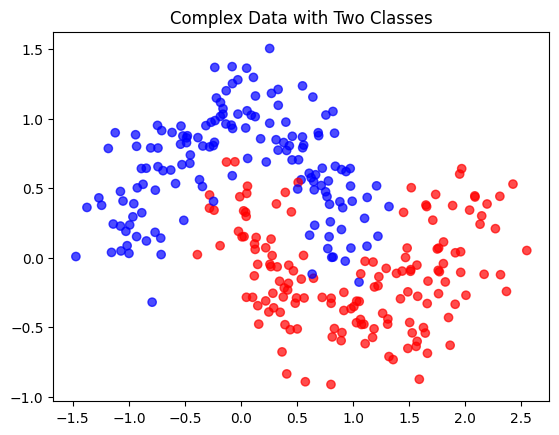

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate moon dataset
X, y = make_moons(n_samples=300, noise=0.2, random_state=42)

# Split data into two classes
A = X[y == 0]
B = X[y == 1]

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.title('Moon Data with Two Classes')
plt.show()

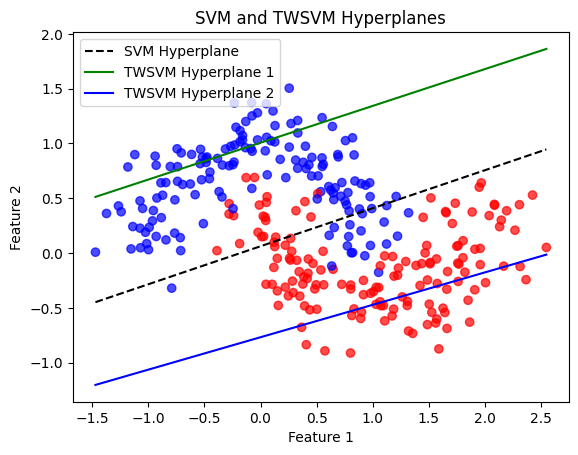

SVM Accuracy: 86.33%
TWSVM Accuracy: 86.67%


In [ ]:

from sklearn.svm import SVC
from scipy.optimize import minimize
from sklearn.metrics import accuracy_score



# Training SVM
svm = SVC(kernel='linear', C=1.0)
svm.fit(X, y)

def compute_hyperplanes(A, B, c1, c2):
    # Number of samples in each class
    m1, n = A.shape
    m2 = B.shape[0]

    # Create the H and G matrices
    e1 = np.ones((m1, 1))
    e2 = np.ones((m2, 1))

    H = np.hstack((A, e1))
    G = np.hstack((B, e2))

    H_inv = np.linalg.inv(H.T.dot(H))

    # Objective function for the dual problem
    def dual_objective(alpha, G, H_inv):
        return - (np.dot(e2.T, alpha) - 0.5 * np.dot(alpha.T, np.dot(G, np.dot(H_inv, G.T.dot(alpha)))))

    # Constraints for the dual problem
    bounds = [(0, c1) for _ in range(m2)]

    # Solve the dual problem to find alpha
    result = minimize(dual_objective, np.zeros(m2), args=(G, H_inv), bounds=bounds)
    alpha = result.x

    # Compute u from alpha
    u = -np.dot(np.dot(H_inv, G.T), alpha)

    # Extract w^(1) and b^(1) from u
    w1 = u[:-1]
    b1 = u[-1]

    Q = np.hstack((B, e2))
    P = np.hstack((A, e1))
    Q_inv = np.linalg.inv(Q.T.dot(Q))

    # Objective function for the second dual problem
    def dual_objective_gamma(gamma, P, Q_inv):
        return - (np.dot(e1.T, gamma) - 0.5 * np.dot(gamma.T, np.dot(P, np.dot(Q_inv, P.T.dot(gamma)))))

    # Constraints for the dual problem
    bounds_gamma = [(0, c2) for _ in range(m1)]

    # Solve the dual problem to find gamma
    result_gamma = minimize(dual_objective_gamma, np.zeros(m1), args=(P, Q_inv), bounds=bounds_gamma)
    gamma = result_gamma.x

    # Compute v from gamma
    v = -np.dot(np.dot(Q_inv, P.T), gamma)

    # Extract w^(2) and b^(2) from v
    w2 = v[:-1]
    b2 = v[-1]

    return (w1, b1), (w2, b2)

# Define the classes and compute TWSVM hyperplanes
class_A = X[y == 0]
class_B = X[y == 1]
c1, c2 = 1.0, 1.0

hyperplane1, hyperplane2 = compute_hyperplanes(class_A, class_B, c1, c2)

# Plot data and hyperplanes
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', alpha=0.7)

# Plot SVM hyperplane
w_svm = svm.coef_[0]
b_svm = svm.intercept_[0]
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals_svm = -(w_svm[0] * x_vals + b_svm) / w_svm[1]
plt.plot(x_vals, y_vals_svm, 'k--', label='SVM Hyperplane')

# Plot TWSVM hyperplanes
w1, b1 = hyperplane1
w2, b2 = hyperplane2
y_vals_twsvm1 = -(w1[0] * x_vals + b1) / w1[1]
y_vals_twsvm2 = -(w2[0] * x_vals + b2) / w2[1]
plt.plot(x_vals, y_vals_twsvm1, 'g-', label='TWSVM Hyperplane 1')
plt.plot(x_vals, y_vals_twsvm2, 'b-', label='TWSVM Hyperplane 2')

plt.legend()
plt.title('SVM and TWSVM Hyperplanes')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# Define TWSVM classifier
class TWSVMClassifier:
    def __init__(self, w1, b1, w2, b2):
        self.w1 = w1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2

    def predict(self, X):
        dist1 = np.abs(np.dot(X, self.w1) + self.b1)
        dist2 = np.abs(np.dot(X, self.w2) + self.b2)
        return np.where(dist1 < dist2, 0, 1)

# Predictions and accuracy
svm_predictions = svm.predict(X)
twsvm_clf = TWSVMClassifier(hyperplane1[0], hyperplane1[1], hyperplane2[0], hyperplane2[1])
twsvm_predictions = twsvm_clf.predict(X)

# Calculate accuracy for SVM
svm_accuracy = accuracy_score(y, svm_predictions)

# Calculate accuracy for TWSVM
twsvm_accuracy = accuracy_score(y, twsvm_predictions)

# Print the results
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print(f"TWSVM Accuracy: {twsvm_accuracy * 100:.2f}%")

